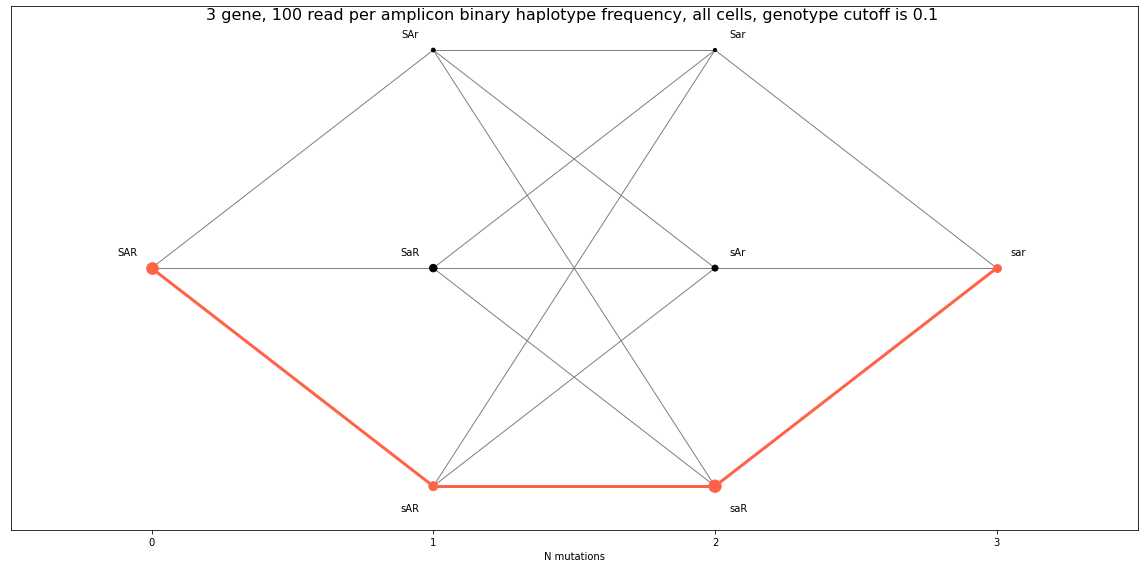

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


trajectory = ['SAR', 'sAR', 'saR', 'sar']
haplo_freqs = {'SAR': 0.3253968253968254,
 'sAR': 0.1111111111111111,
 'SaR': 0.05423280423280423,
 'SAr': 0.0026455026455026454,
 'saR': 0.41798941798941797,
 'sAr': 0.021164021164021163,
 'Sar': 0.0013227513227513227,
 'sar': 0.06613756613756613}
haplo_freqs = pd.Series(haplo_freqs).to_frame(name='freq')

def count_muts(x):
    return (np.array(['S', 'A', 'R']) != list(x)).sum()
haplo_freqs['n_muts'] = [count_muts(x) for x in haplo_freqs['freq'].index] #Count of how many genes are mutated in that haplotype

hmax = haplo_freqs['freq'].max()
fig, ax = plt.subplots(figsize=(16, 8))
for nmut in range(4):
    hap = haplo_freqs.loc[haplo_freqs['n_muts'] == nmut]
    nh = len(hap)
    ys = np.arange(nh) - 0.5 * (nh - 1)
    xs = [nmut] * len(ys)

    # Sizes
    s = 2 + 150 * np.sqrt(hap['freq'].values / hmax)

    # Color
    c = ['tomato' if x in trajectory else 'k' for x in hap.index]

    ax.scatter(xs, ys, s=s, c=c)

    for hname, y in zip(hap.index, ys):
        if (y >= 0) & (nmut < 1.5):
            ax.text(nmut - 0.05, y + 0.05, hname, ha='right',
va='bottom')
        elif y >= 0:
            ax.text(nmut + 0.05, y + 0.05, hname, ha='left',
va='bottom')
        elif nmut < 1.5:
            ax.text(nmut - 0.05, y - 0.08, hname, ha='right', va='top')
        else:
            ax.text(nmut + 0.05, y - 0.08, hname, ha='left', va='top')

    if nmut != 4:
        hap2 = haplo_freqs.loc[haplo_freqs['n_muts'] == nmut + 1]
        nh2 = len(hap2)
        ys2 = np.arange(nh2) - 0.5 * (nh2 - 1)
        for hname, y in zip(hap.index, ys):
            for hname2, y2 in zip(hap2.index, ys2):
                if (trajectory[nmut] == hname) and (trajectory[nmut 
+ 1] == hname2):
                    lw = 3
                    color = 'tomato'
                else:
                    lw = 1
                    color = 'grey'
                ax.plot([nmut, nmut+1], [y, y2], color=color, lw=lw, zorder=0)

ax.set_xlim(-0.5, 3.5)
ax.set_xticks(np.arange(4))
ax.set_xlabel('N mutations')
ax.set_ylim(-1.2, 1.2)
ax.set_yticks([])
fig.tight_layout()

fig.suptitle('3 gene, 100 read per amplicon binary haplotype frequency, all cells, genotype cutoff is 0.1', fontsize=16)
fig.savefig('../Results/Haplotypes/Haplotype_3gen_100amp_cutoff_trajectory_0.1.png',dpi=300)

plt.ion(); plt.show()

In [15]:
haplo_freqs = {'saR': 0.40554156171284633, 'SAR': 0.33879093198992444, 'sAR': 0.1070528967254408, 'sar': 0.06297229219143577, 'SaR': 0.05919395465994962, 'sAr': 0.020151133501259445, 'Sar': 0.003778337531486146, 'SAr': 0.0025188916876574307}
haplo_freqs = pd.Series(haplo_freqs).to_frame(name='freq')

def count_muts(x):
    return (np.array(['S', 'A', 'R']) != list(x)).sum()
haplo_freqs['n_muts'] = [count_muts(x) for x in haplo_freqs['freq'].index]
haplo_freqs

,freq,n_muts
saR,0.405542,2
SAR,0.338791,0
sAR,0.107053,1
sar,0.062972,3
SaR,0.059194,1
sAr,0.020151,2
Sar,0.003778,2
SAr,0.002519,1


In [20]:
for x in range(4):
    ys = np.arange(x) - 0.5 * (x - 1)
    print(ys)

[]
[0.]
[-0.5  0.5]
[-1.  0.  1.]
